In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score,silhouette_samples
import time

In [2]:
#Read and prepare the Dow Jones Index dataset
def read_and_prepare_dataset1():
    # Read the dataset and briefly check its information
    df = pd.read_table('D:/Datasets/dow_jones_index.data', sep=',')
    # print(df.head())
    # print(df.isnull().sum())
    # print(df.shape)
    # print(df.dtypes)

    # Drop quarter and date columns which are not useful; drop stock which is the target column
    df.drop(["quarter", "date", 'stock'], axis=1, inplace=True)


    # Transform the columns of object type into float type
    pd.options.mode.chained_assignment = None
    for x in range(len(df['open'])):
        df['open'][x] = df['open'][x].replace('$', '')
        df['high'][x] = df['high'][x].replace('$', '')
        df['low'][x] = df['low'][x].replace('$', '')
        df['close'][x] = df['close'][x].replace('$', '')
        df['next_weeks_open'][x] = df['next_weeks_open'][x].replace('$', '')
        df['next_weeks_close'][x] = df['next_weeks_close'][x].replace('$', '')

    df['open'] = df.open.astype(float)
    df['high'] = df.high.astype(float)
    df['low'] = df.low.astype(float)
    df['close'] = df.close.astype(float)
    df['next_weeks_open'] = df.next_weeks_open.astype(float)
    df['next_weeks_close'] = df.next_weeks_close.astype(float)

    # Fill the missing values with mean values
    mean_vale1 = df['percent_change_volume_over_last_wk'].mean()
    mean_vale2 = df['previous_weeks_volume'].mean()

    df['percent_change_volume_over_last_wk'].fillna(mean_vale1, inplace=True)
    df['previous_weeks_volume'].fillna(mean_vale2, inplace=True)

    return df

In [3]:
#Read and prepare the Facebook Live dataset
def read_and_prepare_dataset2():
    df = pd.read_csv('D:/Datasets/Live.csv')
    # print(df.head())
    # print(df.isnull().sum())
    # print(df.shape)

    # Drop quarter and date columns which are useless
    df = df.drop(['status_id', 'status_published', 'Column1', 'Column2', 'Column3', 'Column4'], axis=1)

    # Map the status_type column data with numerical values
    from sklearn.preprocessing import LabelEncoder

    stock_le = LabelEncoder()
    df['status_type'] = stock_le.fit_transform(df['status_type'].values)

    return df


In [4]:
#Read and prepare the Sales Transactions dataset
def read_and_prepare_dataset3():
    df = pd.read_csv('D:/Datasets/Sales_Transactions.csv')
    # print(df.head())
    # print(df.isnull().sum())
    # print(df.shape)

    # Drop quarter and date columns which are not useful
    df.drop(['Product_Code'], axis=1, inplace=True)

    return df

In [5]:
#Read and prepare the Water Treatment Plant dataset
def read_and_prepare_dataset4():
    df = pd.read_csv('D:/Datasets/water-treatment.csv')

    df.columns = ["ID", "N. Attrib.", "Q-E", "ZN-E", "PH-E", "DBO-E", "DQO-E", "SS-E", "SSV-E", "SED-E",
                  "COND-E", "PH-P", "DBO-P", "SS-P", "SSV-P", "SED-P", "COND-P", "PH-D", "DBO-D", "DQO-D", "SS-D",
                  "SSV-D", "SED-D", "COND-D", "PH-S", "DBO-S", "DQO-S", "SS-S", "SSV-S", "SED-S", "COND-S", "RD-DBO-P",
                  "RD-SS-P", "RD-SED-P", "RD-DBO-S", "RD-DQO-S", "RD-DBO-G", "RD-DQO-G", "RD-SS-G", "RD-SED-G"]

    # print(df.head())
    # print(df.isnull().sum())
    print(df.shape)

    # drop the ID, ID of attribute which are useless columns
    # drop the output columns which are the pre-defined classification results and useless to unsupervised learning
    df.drop(["ID", "N. Attrib.", "PH-S", "DBO-S", "DQO-S", "SS-S", "SSV-S", "SED-S", "COND-S"], axis=1, inplace=True)

    # drop the columns with high proportional missing values
    df.drop(["SED-E", "SED-P", "ZN-E"], axis=1, inplace=True)

    # Fill the missing values with mean values
    for column in list(df.columns):
        if df[column].isnull().sum() > 0:
            mean_vale = df[column].mean()
            df[column].fillna(mean_vale, inplace=True)

    return df


In [6]:
#Normalise the dataset
def normalise(df):

    scaler = MinMaxScaler()
    scaledValues = scaler.fit_transform(df)

    df_scaled = pd.DataFrame(scaledValues, index=df.index, columns=df.columns)

    return df_scaled

In [7]:
#Doing feature selection by PCA
def feature_selection(n,df):

    pca = PCA(n)
    fit = pca.fit(df)

    features_pca = fit.transform(df)

    return features_pca

In [8]:
#Select the best K value for K-Means clustering by elbow method
def elbow_for_KMeans(df):
    distortions = []
    for i in range(2,31):
        km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
        km.fit(df)
        distortions.append(km.inertia_)

    plt.plot(range(2,31),distortions,marker='o')
    plt.xlabel('The k values')
    plt.ylabel('SSE of the clustering')
    plt.xticks(range(2,31))
    plt.show()

In [9]:
#With the best K value, doing K-Means clustering and calculate the three measurements —
# time taken, davies_bouldin score and silhouette score
def KMeans_clustering_and_measurements(n, df):
    startTime = time.time()

    km = KMeans(n_clusters=n, init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(df)

    endTime = time.time()
    timeTaken = endTime - startTime

    label = km.predict(df)
    DB_score = davies_bouldin_score(df,label)
    CSM = silhouette_score(df,label)

    print('The time taken is: ',timeTaken)
    print('The davies_bouldin is: ', DB_score)
    print('The CSM is: ', CSM)

    return label

In [10]:
#Determining the best eps for DBSCAN clustering
def eps_and_DB_CSM_score(EPS,n,df):
    DB_scores = []
    CSM_scores = []
    Labels_unique = []

    for eps in EPS:
        db = DBSCAN(eps=eps, min_samples=n, metric='euclidean')
        labels = db.fit_predict(df)

        #Get the davies_bouldin score
        DB_score = davies_bouldin_score(df,labels)
        DB_scores.append(DB_score)

        #Get the silhouette score
        silhou_score = silhouette_score(df,labels)
        CSM_scores.append(silhou_score)

        #Get the unique cluster labels
        Labels_unique.append(np.unique(labels))

    EPS_DB_CSMS = zip(EPS,DB_scores,CSM_scores, Labels_unique)

    print("The eps and the corresponding davies_bouldin score, silhouette score, and unique labels are:")
    for EPS_DB_CSM in EPS_DB_CSMS:
        print(EPS_DB_CSM)


In [11]:
#Doing DBSCAN clustering and calculate the three measurements
def DBSCAN_clustering_and_measurements(eps,n,df):
    start_time = time.time()

    db_final = DBSCAN(eps=eps, min_samples=n, metric='euclidean')
    labels = db_final.fit_predict(df)

    end_time = time.time()
    time_Taken = end_time - start_time

    DB_score = davies_bouldin_score(df, labels)
    CSM = silhouette_score(df, labels)

    print('The time taken is: ',time_Taken)
    print('The davies_bouldin is: ', DB_score)
    print('The CSM is: ', CSM)

    return labels

In [12]:
#Determining the best number of clusters for agglomerative clustering by CSM score
def clusterNum_CSM(df):
    CSM_scores = []

    for i in range(2,16):
        agg = AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='ward')
        labels = agg.fit_predict(df)
        CSM_score = silhouette_score(df,labels)
        CSM_scores.append(CSM_score)

    plt.plot(range(2,16),CSM_scores)
    plt.xlabel('Number of clusters in agglomerative clustering')
    plt.ylabel('CSM score')
    plt.xticks(range(2,16))
    plt.grid()
    plt.show()

In [13]:
#Doing Agglomerative clustering and calculate the three measurements
def Agglomerative_clustering_and_measurements(n,df):
    start_time = time.time()

    agg = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='ward')
    labels = agg.fit_predict(df)

    end_time = time.time()
    time_Taken = end_time - start_time

    DB_score = davies_bouldin_score(df, labels)
    CSM = silhouette_score(df, labels)

    print('The time taken is: ',time_Taken)
    print('The davies_bouldin is: ', DB_score)
    print('The CSM is: ', CSM)

    return labels

In [14]:
#Plot the CSM graph for clustering
def CSM_graph(df, label):

    silhouette_vals = silhouette_samples(df, label, metric='euclidean')

    # Initiate the y axis values for silhouette values
    y_bottom, y_top = 0, 0
    yticks = []

    # Get the cluster labels
    labels_cluster = np.unique(label)
    number_cluster = len(labels_cluster)

    # Enumerate the cluster IDs and clusters in the cluster-labels
    for id, n in enumerate(labels_cluster):
        # Gather the silouette values of the cluster n
        n_silhouette_vals = silhouette_vals[label == n]
        # Sort the sihouette values in ascending order
        n_silhouette_vals.sort()

        # Adjust the y-axis value according to the number of silhouette values
        y_top += len(n_silhouette_vals)

        # Generate colour schema based on different scalar data
        color = cm.jet(float(id / number_cluster))
        # plot the bar chart for the silhouette values
        plt.barh(range(y_bottom, y_top), n_silhouette_vals,
                 height=1.0, edgecolor='none', color=color)

        yticks.append((y_bottom + y_top) / 2.)
        y_bottom += len(n_silhouette_vals)

    silhou_avg = np.mean(silhouette_vals)

    # plot the vertical line for the average silhouette value
    plt.axvline(silhou_avg, color="red", linestyle="--")

    plt.yticks(yticks, labels_cluster)

    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficients')
    plt.show()

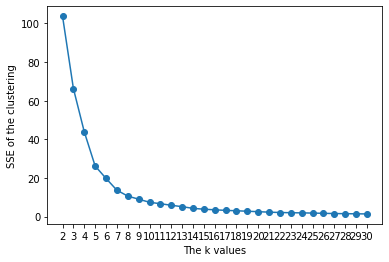

The time taken is:  0.03000664710998535
The davies_bouldin is:  0.6024012592840325
The CSM is:  0.4955983947500687


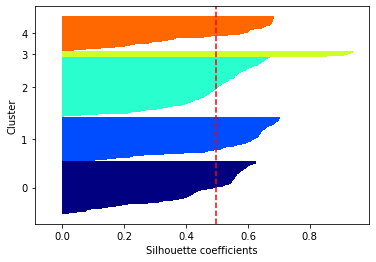

In [15]:
#1. For the Dow Jones Index dataset
df1 = read_and_prepare_dataset1()
df1_scaled = normalise(df1)
df1_pca = feature_selection(2,df1_scaled)

    #Doing K-Means clustering
    #Plot elbow graph
elbow_for_KMeans(df1_pca)
    #Calculating the measurements and plot CSM (k=5 is the best from elbow method)
labels1_KMeans = KMeans_clustering_and_measurements(5,df1_pca)
CSM_graph(df1_pca,labels1_KMeans)

The eps and the corresponding davies_bouldin score, silhouette score, and unique labels are:
(0.1, 0.6993854230253672, 0.40199539248511557, array([-1,  0,  1,  2,  3], dtype=int64))
(0.2, 0.2743158176830056, 0.6539454894164648, array([0, 1], dtype=int64))
(0.3, 0.2743158176830056, 0.6539454894164648, array([0, 1], dtype=int64))
(0.4, 0.2743158176830056, 0.6539454894164648, array([0, 1], dtype=int64))
(0.5, 0.2743158176830056, 0.6539454894164648, array([0, 1], dtype=int64))
The time taken is:  0.007001638412475586
The davies_bouldin is:  0.2743158176830056
The CSM is:  0.6539454894164648


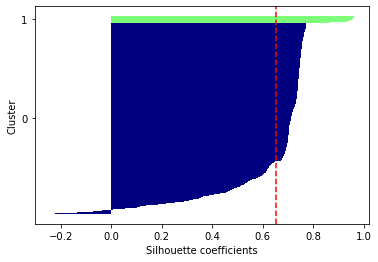

In [16]:
    #Doing DBSCAN clustering (n_samples = 2*2 = 4)
    #Exhaustively getting the davies_bouldin_score, silhouette score, and unique cluster labels for each eps
EPS1 = [0.1,0.2,0.3,0.4,0.5]
eps_and_DB_CSM_score(EPS1,4,df1_pca)
    #Calculating the measurements and plot CSM (eps=0.5 is the best from observation)
labels1_DBSCAN = DBSCAN_clustering_and_measurements(0.5,4,df1_pca)
CSM_graph(df1_pca,labels1_DBSCAN)

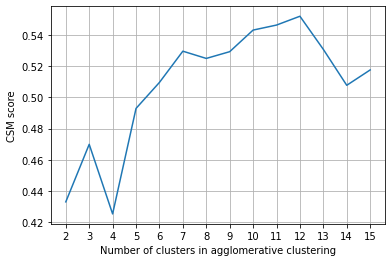

The time taken is:  0.011003255844116211
The davies_bouldin is:  0.5608172890297296
The CSM is:  0.5522321563379701


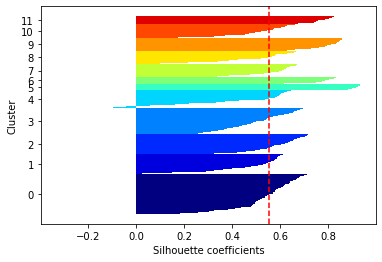

In [17]:
    #Doing Agglomerative clustering
    #Plot the correlation between the number of clusters and CSM score to determine the best cluster number
clusterNum_CSM(df1_pca)
    #Calculating the measurements and plot CSM (number of clusters = 12 is the best from observation)
labels1_Agglomerative = Agglomerative_clustering_and_measurements(12,df1_pca)
CSM_graph(df1_pca,labels1_Agglomerative)

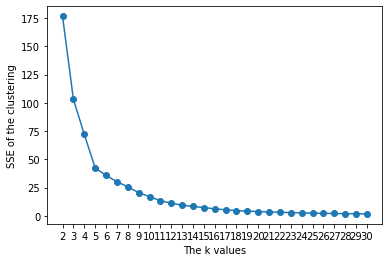

The time taken is:  0.04601025581359863
The davies_bouldin is:  0.45051398594361236
The CSM is:  0.833994873897213


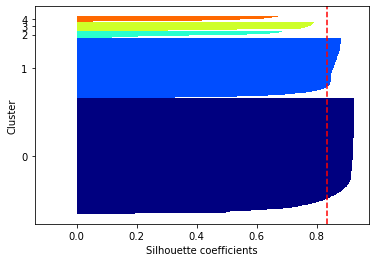

In [18]:
#2. For the Facebook Live dataset
df2 = read_and_prepare_dataset2()
df2_scaled = normalise(df2)
df2_pca = feature_selection(2,df2_scaled)

    #Doing K-Means clustering
    #Plot elbow graph
elbow_for_KMeans(df2_pca)
    #Calculating the measurements and plot CSM (k=5 is the best from elbow method)
labels2_KMeans = KMeans_clustering_and_measurements(5,df2_pca)
CSM_graph(df2_pca,labels2_KMeans)


The eps and the corresponding davies_bouldin score, silhouette score, and unique labels are:
(0.1, 0.34814118398142696, 0.7451283527009541, array([-1,  0,  1,  2,  3,  4,  5,  6,  7], dtype=int64))
(0.2, 0.647321012538642, 0.7670197511853996, array([0, 1, 2, 3], dtype=int64))
(0.3, 0.647321012538642, 0.7670197511853996, array([0, 1, 2, 3], dtype=int64))
The time taken is:  0.2850637435913086
The davies_bouldin is:  0.647321012538642
The CSM is:  0.7670197511853996


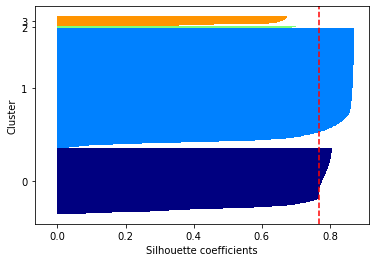

In [19]:
    #Doing DBSCAN clustering (n_samples = 2*2 = 4)
    #Exhaustively getting the davies_bouldin_score, silhouette score, and unique cluster labels for each eps
EPS2 = [0.1,0.2,0.3]
eps_and_DB_CSM_score(EPS2,4,df2_pca)
    #Calculating the measurements and plot CSM (eps=0.1 is the best from observation)
labels2_DBSCAN = DBSCAN_clustering_and_measurements(0.3,4,df2_pca)
CSM_graph(df2_pca,labels2_DBSCAN)


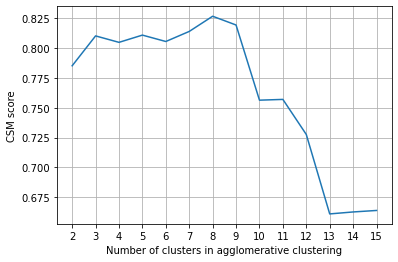

The time taken is:  0.836186408996582
The davies_bouldin is:  0.5507630898365561
The CSM is:  0.8268707944843909


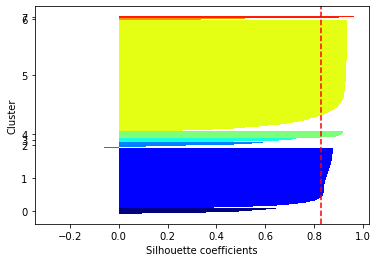

In [20]:
    #Doing Agglomerative clustering
    #Plot the correlation between the number of clusters and CSM score to determine the best cluster number
clusterNum_CSM(df2_pca)
    #Calculating the measurements and plot CSM (number of clusters = 8 is the best from observation)
labels2_Agglomerative = Agglomerative_clustering_and_measurements(8,df2_pca)
CSM_graph(df2_pca,labels2_Agglomerative)

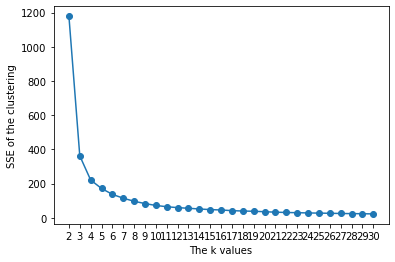

The time taken is:  0.027005910873413086
The davies_bouldin is:  0.5894691253793053
The CSM is:  0.5882000929941654


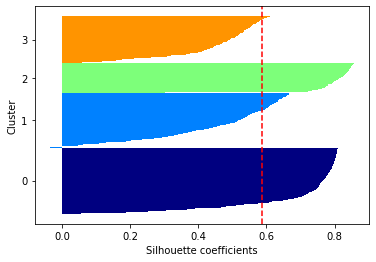

In [21]:
#3. For the Sales Transactions dataset
df3 = read_and_prepare_dataset3()
df3_scaled = normalise(df3)
df3_pca = feature_selection(2,df3_scaled)

    #Doing K-Means clustering
    #Plot elbow graph
elbow_for_KMeans(df3_pca)
    #Calculating the measurements and plot CSM (k=4 is the best from elbow method)
labels3_KMeans = KMeans_clustering_and_measurements(4,df3_pca)
CSM_graph(df3_pca,labels3_KMeans)


The eps and the corresponding davies_bouldin score, silhouette score, and unique labels are:
(0.1, 0.9794193833641951, 0.07264663942014625, array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64))
(0.2, 3.9763698084513464, 0.3636319196857471, array([-1,  0,  1,  2,  3,  4,  5], dtype=int64))
(0.3, 0.907694298163109, 0.4328078144501556, array([-1,  0,  1], dtype=int64))
(0.4, 1.1217122448748873, 0.40133579447240153, array([-1,  0,  1], dtype=int64))
(0.5, 0.5487144438014209, 0.30248392144822744, array([-1,  0,  1,  2], dtype=int64))
(0.6, 0.3758573503063194, 0.6537664536912273, array([0, 1], dtype=int64))
(0.7, 0.3758573503063194, 0.6537664536912273, array([0, 1], dtype=int64))
The time taken is:  0.004000663757324219
The davies_bouldin is:  0.3758573503063194
The CSM is:  0.6537664536912273


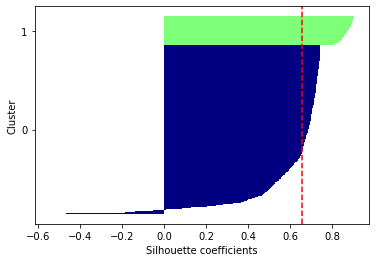

In [22]:
    #Doing DBSCAN clustering (n_samples = 2*2 = 4)
    #Exhaustively getting the davies_bouldin_score, silhouette score, and unique cluster labels for each eps
EPS3 = [0.1,0.2,0.3,0.4,0.5,0.6,0.7]
eps_and_DB_CSM_score(EPS3,4,df3_pca)
    #Calculating the measurements and plot CSM (eps=0.7 is the best from observation)
labels3_DBSCAN = DBSCAN_clustering_and_measurements(0.7,4,df3_pca)
CSM_graph(df3_pca,labels3_DBSCAN)

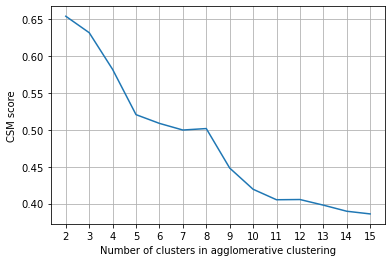

The time taken is:  0.013002634048461914
The davies_bouldin is:  0.3758573503063194
The CSM is:  0.6537664536912273


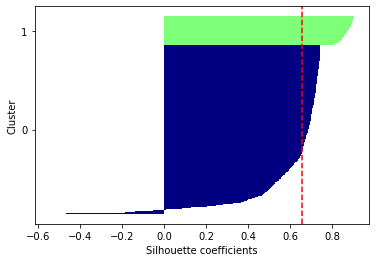

In [23]:
    #Doing Agglomerative clustering
    #Plot the correlation between the number of clusters and CSM score to determine the best cluster number
clusterNum_CSM(df3_pca)
    #Calculating the measurements and plot CSM (number of clusters = 2 is the best from observation)
labels3_Agglomerative = Agglomerative_clustering_and_measurements(2,df3_pca)
CSM_graph(df3_pca,labels3_Agglomerative)

(526, 40)


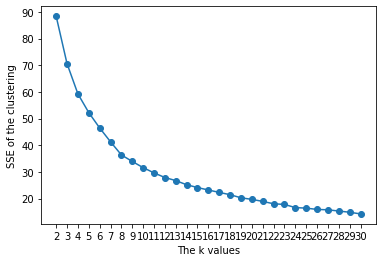

The time taken is:  0.06501317024230957
The davies_bouldin is:  1.04396729703505
The CSM is:  0.2705830768674997


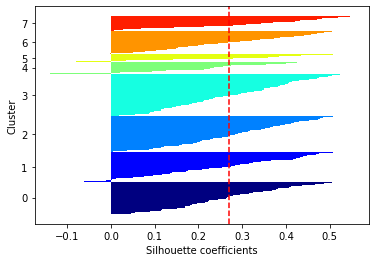

In [24]:
#4. For the Water Treatment Plant dataset
df4 = read_and_prepare_dataset4()
df4_scaled = normalise(df4)
df4_pca = feature_selection(3,df4_scaled)

    #Doing K-Means clustering
    #Plot elbow graph
elbow_for_KMeans(df4_pca)
    #Calculating the measurements and plot CSM (k=8 is the best from elbow method)
labels4_KMeans = KMeans_clustering_and_measurements(8,df4_pca)
CSM_graph(df4_pca,labels4_KMeans)

The eps and the corresponding davies_bouldin score, silhouette score, and unique labels are:
(0.1, 3.50711317091685, -0.22299200515806983, array([-1,  0,  1,  2,  3], dtype=int64))
(0.2, 2.4071086698690065, 0.36816164218361647, array([-1,  0], dtype=int64))
(0.3, 0.885966636346506, 0.48493663962145367, array([-1,  0], dtype=int64))
(0.4, 0.32587940414217376, 0.5308589667798242, array([-1,  0], dtype=int64))
(0.5, 0.32587940414217376, 0.5308589667798242, array([-1,  0], dtype=int64))
The time taken is:  0.0030007362365722656
The davies_bouldin is:  3.50711317091685
The CSM is:  -0.22299200515806983


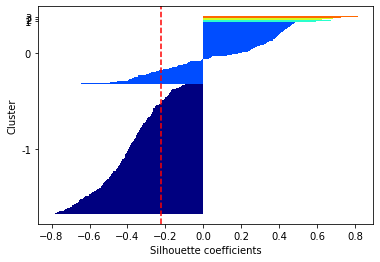

In [25]:
   #Doing DBSCAN clustering (n_samples = 2*3 = 6)
    #Exhaustively getting the davies_bouldin_score, silhouette score, and unique cluster labels for each eps
EPS4 = [0.1,0.2,0.3,0.4,0.5]
eps_and_DB_CSM_score(EPS4,6,df4_pca)
    #Calculating the measurements and plot CSM (No best eps value; However, eps=0.1 is selected for further comparison)
labels4_DBSCAN = DBSCAN_clustering_and_measurements(0.1,6,df4_pca)
CSM_graph(df4_pca,labels4_DBSCAN)

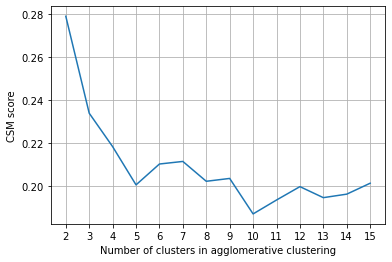

The time taken is:  0.007001638412475586
The davies_bouldin is:  1.1815169040238918
The CSM is:  0.2791592065851122


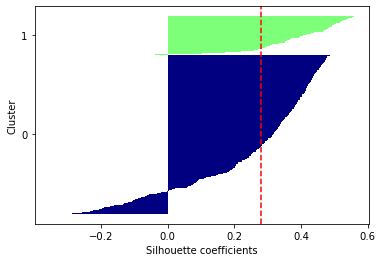

In [26]:
    #Doing Agglomerative clustering
    #Plot the correlation between the number of clusters and CSM score to determine the best cluster number
clusterNum_CSM(df4_pca)
    #Calculating the measurements and plot CSM (number of clusters = 2 is the best from observation)
labels4_Agglomerative = Agglomerative_clustering_and_measurements(2,df4_pca)
CSM_graph(df4_pca,labels4_Agglomerative)